In [1]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.oauth2.service_account import Credentials

In [5]:
SERVICE_ACCOUNT_FILE = '../../key/credentials.json'
SCOPES = ['https://www.googleapis.com/auth/spreadsheets',
          'https://www.googleapis.com/auth/drive']

creds = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(creds)

sheet = client.open("Recheck HC").worksheet("Recheck")
data = sheet.get_all_values()

df = pd.DataFrame(data[1:], columns=data[0])

df.to_csv('../../dataset_qc/recheck_hc.csv')

In [50]:
# cleaning and feature engineering
feature = df.copy()

count_feature = [
    'Count Hasil ASR', 'Count Hasil Pemeriksaan Kualitas', 'Count Efektif',
    'Count Kejelasan Suara', 'Count Suara Lain', 'Count Kelengkapan Rekaman',
    'Count Revisi text']

cols = ['Tanggal Pengerjaan', 'Red Label', *count_feature]

feature[count_feature] = (
    feature[count_feature]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
    .astype(int)
)

feature['Red Label'] = feature['Red Label'].replace('', 'CLEAR').astype('category')

# Reassigning
feature = feature[cols].copy()
feature['Tanggal Pengerjaan'] = pd.to_datetime(feature['Tanggal Pengerjaan'])

feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8134 entries, 0 to 8133
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Tanggal Pengerjaan                8134 non-null   datetime64[ns]
 1   Red Label                         8134 non-null   category      
 2   Count Hasil ASR                   8134 non-null   int64         
 3   Count Hasil Pemeriksaan Kualitas  8134 non-null   int64         
 4   Count Efektif                     8134 non-null   int64         
 5   Count Kejelasan Suara             8134 non-null   int64         
 6   Count Suara Lain                  8134 non-null   int64         
 7   Count Kelengkapan Rekaman         8134 non-null   int64         
 8   Count Revisi text                 8134 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(7)
memory usage: 516.6 KB


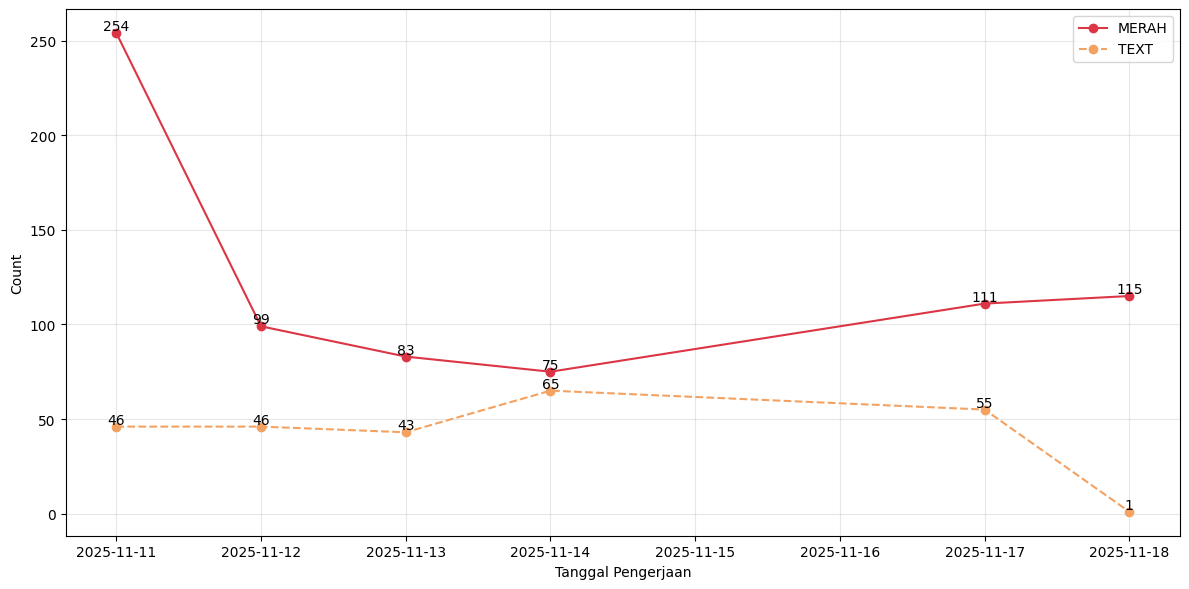

In [51]:
# Filter
red_data = feature[feature['Red Label'].str.upper() == "MERAH"]
text_data = feature[feature['Red Label'].str.upper() == "TEXT"]

# Aggregate by date
red_daily = red_data.groupby('Tanggal Pengerjaan').size()
text_daily = text_data.groupby('Tanggal Pengerjaan').size()

# Plot
plt.figure(figsize=(12, 6))

plt.plot(
    red_daily.index,
    red_daily.values,
    marker='o',
    linestyle='-',
    label='MERAH',
    color='#dc3545'
)

for x, y in zip(red_daily.index, red_daily.values):
    plt.text(x, y, str(y), ha='center', va='bottom'   )

plt.plot(
    text_daily.index,
    text_daily.values,
    marker='o',
    linestyle='--',
    label='TEXT',
    color='#f4a261'
)

for x, y in zip(text_daily.index, text_daily.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.title('')
plt.xlabel('Tanggal Pengerjaan')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

In [44]:
analysis

,No,Tanggal Pengerjaan,Nama Agent,ASI/AFI,Waktu Inbound,Nomor Inbound,Nama Agent,Call ID,Durasi Bicara,Detik,...,Kelengkapan Rekaman,Revisi Teks,Red Label,Count Hasil ASR,Count Hasil Pemeriksaan Kualitas,Count Efektif,Count Kejelasan Suara,Count Suara Lain,Count Kelengkapan Rekaman,Count Revisi text
0,1,2025-11-11,Azer,ASI,2025-08-19 20:57:59,0852****8828,TCHL_Anindyka Alfisyah,7f20d864c6224ed3bff2c2c3fc4f79e4,0:05:52,2025-08-19 20:58:44,...,0 Utuh,,,,,,,,,
1,2,2025-11-11,Azer,ASI,2025-08-19 20:57:59,0852****8828,TCHL_Anindyka Alfisyah,7f20d864c6224ed3bff2c2c3fc4f79e4,0:05:52,2025-08-19 20:58:59,...,0 Utuh,,,,,,,,,
2,3,2025-11-11,Azer,ASI,2025-08-19 20:57:59,0852****8828,TCHL_Anindyka Alfisyah,7f20d864c6224ed3bff2c2c3fc4f79e4,0:05:52,2025-08-19 20:59:03,...,1 Tidak Utuh,levi,TEXT,,,,,,,1
3,4,2025-11-11,Azer,ASI,2025-08-19 20:57:59,0852****8828,TCHL_Anindyka Alfisyah,7f20d864c6224ed3bff2c2c3fc4f79e4,0:05:52,2025-08-19 20:59:08,...,0 Utuh,,,,,,,,,
4,5,2025-11-11,Azer,ASI,2025-08-19 20:57:59,0852****8828,TCHL_Anindyka Alfisyah,7f20d864c6224ed3bff2c2c3fc4f79e4,0:05:52,2025-08-19 20:59:15,...,1 Tidak Utuh,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8129,8130,2025-11-18,Azer,ASI,2025-07-03 12:40:06,0812****1483,Umi Nur Lisa,1c6671e62b254598b2ecb4da2fb5baf4,0:05:18,2025-07-03 12:43:15,...,1 Tidak Utuh,,,,,,,,,
8130,8131,2025-11-18,Azer,ASI,2025-07-03 12:40:06,0812****1483,Umi Nur Lisa,1c6671e62b254598b2ecb4da2fb5baf4,0:05:18,2025-07-03 12:43:31,...,1 Tidak Utuh,,MERAH,,,,1,,,
8131,8132,2025-11-18,Azer,ASI,2025-07-03 12:40:06,0812****1483,Umi Nur Lisa,1c6671e62b254598b2ecb4da2fb5baf4,0:05:18,2025-07-03 12:43:37,...,1 Tidak Utuh,,,,,,,,,
8132,8133,2025-11-18,Azer,ASI,2025-07-03 12:40:06,0812****1483,Umi Nur Lisa,1c6671e62b254598b2ecb4da2fb5baf4,0:05:18,2025-07-03 12:44:24,...,1 Tidak Utuh,,,,,,,,,


In [ ]:
analysis = df.copy()

analysis['Tanggal Pengerjaan'] = pd.to_datetime(analysis['Tanggal Pengerjaan'], errors='coerce')

analysis[
    (analysis['Tanggal Pengerjaan'] == '11/17/2025') &
    (analysis['ASI/AFI'] == 'ASI ')
][['Nama Agent ', 'Call ID ', 'Tanggal Pengerjaan', 'ASI/AFI']].drop_duplicates(subset='Call ID ')

,Nama Agent,Call ID,Tanggal Pengerjaan,ASI/AFI
6556,Azer,3f7301b510d04c22811f33a7b95ff8a7,2025-11-17,ASI
6612,Azer,6d20b1bd9a2d4599b7f1d1c611cd1360,2025-11-17,ASI
6647,Azer,63b37e08f18d4cce98baff985d625a26,2025-11-17,ASI
6752,Neneng,6d07e79cc1e447f2b2206ee31f10e3d1,2025-11-17,ASI
6769,Neneng,b1fe714c472346fa849c370239b7921d,2025-11-17,ASI
7220,Reza,3d21321e73604cf695779f0fc7851b41,2025-11-17,ASI
7363,Reza,42280af1aac141468efb5cc57bc8b088,2025-11-17,ASI
7404,Reza,8624ee40ad1544e891ca9207989c7e7c,2025-11-17,ASI
7447,Reza,e25e4387c97a4c54bfb8b61caa35e84a,2025-11-17,ASI
7550,Reza,8e3b77bab8e14e09bf7ea64420049642,2025-11-17,ASI
